In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os

In [3]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv(r'2002FemPreg.csv',low_memory=False)
df = df[['caseid','prglngth','outcome','pregordr','birthord','totalwgt_lb','agepreg','finalwgt']]
df_live = df[df['outcome']==1]
# removing null values
df = df_live[df_live['totalwgt_lb'].notnull()]

<BarContainer object of 36 artists>

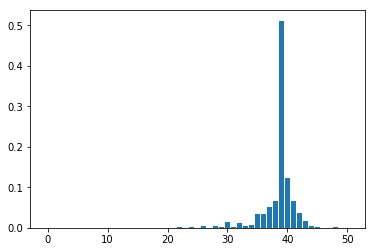

In [15]:
def calc_pmf(key,df):
    freq = df[key].value_counts().sort_index()
    freq_sum = sum(freq)
    pmf = freq/freq_sum
    return pmf.index,pmf.values

x,y = calc_pmf('prglngth',df)
# sum of the pmf should be 1

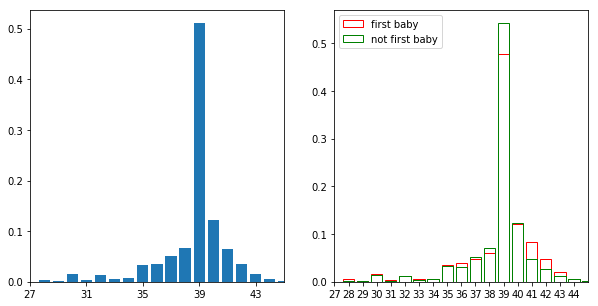

In [52]:
# we can compare two different data with different sample sizes in pmf unlike histogram plots
df_first_child = df[df['birthord']==1]
df_not_first_child = df[df['birthord']!=1]

x1,y1 = calc_pmf('prglngth',df_first_child)
x2,y2 = calc_pmf('prglngth',df_not_first_child)

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,5)
ax1.bar(x,y)
ax2.bar(x1,y1,label='first baby',facecolor='None',edgecolor='red')
ax2.bar(x2,y2,label='not first baby',facecolor='None',edgecolor='green')
ax1.set_xlim(27,45)
ax1.set_xticks(np.arange(27,45,4))
ax2.set_xlim(27,45)
ax2.set_xticks(np.arange(27,45,1))
ax2.legend()

In [ ]:
# to plot the difference between the plots
# most data in concentrated near the mode
rng = [35,44]

